<a href="https://colab.research.google.com/github/saayman1/MusicRecommendationSystem/blob/main/Music_Recommendation_System_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

With the advent of technology, societies have become more efficient with their lives. At the same time, however, individual human lives have also become more fast-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has, in fact, made it easier for humans with a shortage of time to find and consume good content. Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume.

Spotify is one such audio content provider with a huge market base across the world. With the ever-increasing volume of songs becoming available on the Internet, searching for songs of interest has become a tedious task in itself. However, Spotify has grown significantly in the market because of its ability to recommend the ‘best’ next song to each and every customer based on a huge preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.

### **The objective:**

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **The key questions:**

- What are the top 10 songs for a user?
- How do we find the top songs for a user?
- How do we find songs based on user preferences?
- What type of recommendation system is most appropriate for this situation?
- What evaluation metrics will help us determine which system to use?
- How many users and songs are we working with? Are we missing any important data?
- How many people like/dislike a particular song relative to how many people have listened to it?



### **The problem formulation**:

We are aiming to build a recommendation system that adds significant value to the user experience, making song discovery seamless and enjoyable for Spotify users. It will recommend the top 10 songs for a user based on the likelihood of listening to those songs.  



## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')


# Basic libraries of python for numeric and dataframe computations
import numpy as np #import numpy
import pandas as pd #import pandas

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv("/content/drive/MyDrive/MIT/capstone project/Copy of count_data.csv") #import count data from drive and put in dataframe called count_df
song_df = pd.read_csv("/content/drive/MyDrive/MIT/capstone project/Copy of song_data.csv") #import song data from drive and put in dataframe called song_df

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10) #show top 10 records of count_df

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10) #show top 10 records of song_df

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**
We see that count_df has 20000 entries, with user_id as type object, song_id as type object and play_count as type int64. song_df has 10000 entries, with song_id as type object, title as type object, release as type object, artist_name as type object, year as type int64. We can see that title and release are missning some data.

We can see that there are missing values in the dataset. 25 missing titles and 5 missing releases. To handle this, we will merge the two datasets, count_df and song_df and drop the duplicates.

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
cf = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
cf=cf.drop(['Unnamed: 0'], axis=1)

## Name the obtained dataframe as "df"
df=cf.copy(deep =True)

In [ ]:
df.info() #show info of df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


We can see that there are no longer any missing values in the dataset.

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class from scikit-learn
le=LabelEncoder() # Create an instance of the LabelEncoder
df['user_id']=le.fit_transform(df['user_id']) # Use the LabelEncoder to transform the 'user_id' column in the DataFrame 'df'
df['song_id']=le.fit_transform(df['song_id']) # Use the LabelEncoder to transform the 'song_id' column in the DataFrame 'df'

In [ ]:
df.head() #show top 5 records of df

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [ ]:
df_final.info() #show info of df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


There are no longer any missing values in the data.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:__________**
There are 3155 unique users in the data
There are 563 unique songs in the data
There are 232 unique artists in the data.

Given the number of unique users and unique songs in the data, there are a total possible combinations of atleast 1776 265. (3155 x 563).

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final.groupby('song_id').size().sort_values(ascending=False) # Group the DataFrame 'df_final' by 'song_id', calculate the size (count) of each group, and sort the values in descending order

song_id
8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Length: 563, dtype: int64

Most interacted users

In [ ]:
df_final.groupby('user_id').size().sort_values(ascending=False) # Group the DataFrame 'df_final' by 'user_id', calculate the size (count) of each group, and sort the values in descending order

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
14662      1
19776      1
33657      1
34194      1
76347      1
Length: 3155, dtype: int64

#### **Observations and Insights:_______**
The most interacted song has the ID 8582 and the song was interacted with 751 times. This tells us this is a popular song and theres possibility of recommendation. The most interacted user has the ID 243 and the user interacted with 243 songs. As we've previously seen, there are a total of 563 unique songs. Given that the most user with the most interactions has only 243 interactions, we can assume that the user has not interacted with every song. This gives us room for recomendations.

Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column
count_songs = df_final.groupby('year').count()['title'] # Group the DataFrame 'df_final' by 'year', count the occurrences of each year, and select the 'title' column
count = pd.DataFrame(count_songs) # Create a new DataFrame 'count' with the count of songs for each year

count.drop(count.index[0], inplace = True) # Drop the first index from the 'count' DataFrame (assuming it represents a NaN or undesired value)

count.tail() # Display the last few rows of the 'count' DataFrame


,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


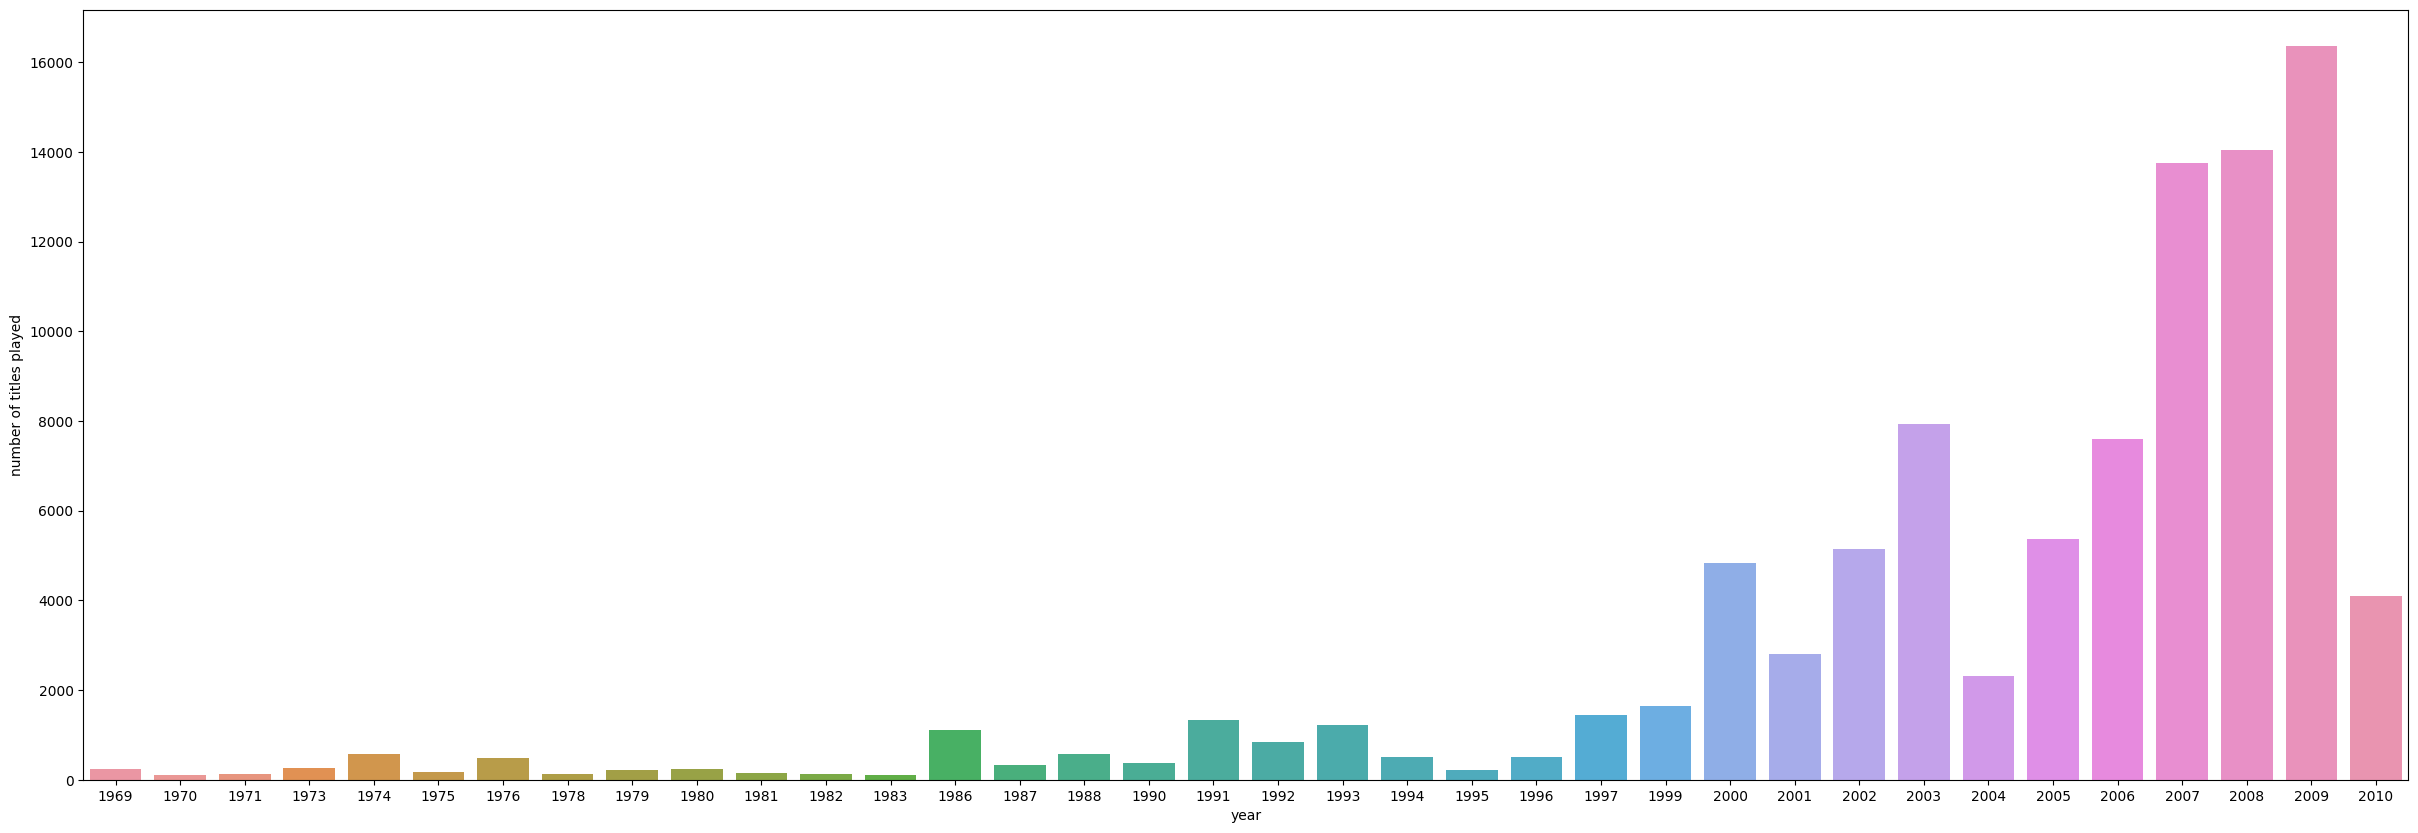

In [ ]:

# Set the figure size
plt.figure(figsize=(30,10))
# Create a barplot plot with y label as "number of titles played" and x -axis year

sns.barplot(x = count.index, # Use Seaborn to create a bar plot
            y = 'title',
            data = count,
            estimator = np.median) # x-axis: 'year', y-axis: 'title', estimate the central tendency using the median


# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()


#### **Observations and Insights:__________** #

We can see the number of songs played in a year does not exceed 4000 until the year 2000. From 1969 to 2000 the number of songs played in a year is below 2000.

We see a drop in the number of songs played in a year from 2000 to 2001.

We can see significant increases in songs played in a year in years 2000, 2003, 2007 and 2009.

We can see that the number of songs played in a year signifcantly dropped from 2009 to 2010.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby('song_id')['play_count'].mean() # Group the DataFrame 'df_final' by 'song_id', calculate the mean of 'play_count' for each song

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].count() # Group the DataFrame 'df_final' by 'song_id', count the occurrences of 'play_count' for each song

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count':average_count, 'play_freq':play_freq}) # Create a new DataFrame 'final_play' with columns for 'average_count' and 'play_freq'

# Let us see the first five records of the final_play dataset
final_play.head()


,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(final_play, n, min_play_count): # Define a function to recommend the top N songs based on play frequency and average play count
    recommendations = final_play[final_play['play_freq'] > min_play_count]     # Filter songs with play frequency greater than the specified minimum play count
    recommendations = recommendations.sort_values('average_count', ascending=False)     # Sort the filtered songs by average play count in descending order
    return recommendations.index[:n]     # Return the indices (song_ids) of the top N recommended songs

In [ ]:
# Recommend top 10 songs using the function defined above
top_n_songs(final_play, 10, 10) #Return song IDS of songs with the top 10 songs with a minimum play count of 10

Int64Index([7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614], dtype='int64', name='song_id')

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163759 sha256=c644e57b454942e14d4499f9a902478608c38e8ea6a718e04278c10df58bee8b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Create a surprise Dataset object from a subset of the DataFrame 'df_final' containing 'user_id', 'song_id', and 'play_count'
# 'reader' is the specified reader object used to parse the data


# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = { 'name': 'cosine',
                'user_based':True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user= KNNBasic(sim_options = sim_options, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user, k = 30)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**

We observe our model has a baseline RMSE of 1.08.

A recall of 0.692, this means out of all revelvant songs 69.2% are recommended.

A Precision score of 0.396, this means that out of all recommended songs, 39.6% are relevant.

A F-1 Score of 0.504. It can be improved by tuning the hyperparameters.

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(6958,1671, r_ui = 2, verbose = True) # Use the user-user collaborative filtering model 'sim_user_user' to predict the rating for user 6958 on song 1671 with r_ui = 2


user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(6958, 3232, verbose = True) #Use the user-user collaborative filtering model 'sim_user_user' to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

We predicted play counts for the user 6958. We then predicted their play counts for a song we already know has play count of 2, and got a predicted play count of 1.80. We then predicted the same user's play count for a song they had not previously played and got a predicted play count of 1.64.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = { 'k': [10, 20, 30], 'min_k': [3,6,9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True], 'min_support': [2,4]}
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs= GridSearchCV(KNNBasic, param_grid, measures = ['rmse' ], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0471998393900106
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
#Update sim_user_user_optimized with the optimal hyperparameters
sim_options = {'name': 'pearson_baseline',
               'user_based': True, 'min_support': 2}
sim_user_user_optimized= KNNBasic(sim_options = sim_options, k = 30, min_k=9, random_state = 1)
sim_user_user_optimized.fit(trainset)
precision_recall_at_k(sim_user_user_optimized, k = 30)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:_________**

We observe our model's RMSE score has decreased from 1.08 to 1.052.

Our model's precision score has increased from 0.396 to 0.413. This means out of all revelvant songs 41.3% are recommended.

Our model's recall score has increased from 0.692 to 0.721. This means that out of all recommended songs, 72.1% are relevant.

Our model's F-1 Score has increased from 0.504 to 0.525. We can say our model has improved.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True) # Use the user-user collaborative filtering model 'sim_user_user_optimized' to predict the rating for user 6958 on song 1671 with r_ui = 2

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958,3232, verbose = True) # Use the user-user collaborative filtering model 'sim_user_user_optimized' to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:______________**

Our model's prediction for user 6958 for song 1671 has gotten more accurate. Our tuned model predicts the playcount to be 1.96 when the actual playcount is 2. This reflects our belief that the model has improved after tuning hyperparameters.

Our model's prediction for user 6958 for song 3232, a song they have previously not played, to have a play count of 1.45.

**Think About It:** Along with
making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0,5) # Use the user-user collaborative filtering model 'sim_user_user_optimized' to get similar users of user 0


[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for song_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted ratings
        recommendations.append((song_id, est))
    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user


In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])



,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:______________**
Out of the top 5 recommended songs for user 6958, song 5531 has the highest predicted rating of 2.55. The lowest rated predicted song is 5943 with a predicted rating of 2.39. We know these are the top 5 recommended songs for the user yet the highest predicted rating is 2.55. This tells us that this user may not give high ratings to songs.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()
  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_ratings']), on = 'song_id', how = 'inner')
  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])
  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


**Observations and Insights:______________**
After applying the ranking_songs to our predicted ratings we see that user 6958's top song, 5531 is not rated at 2.51. This had dropped from the predicted rating of 2.55. The same can be seen with the lowest rated song 8635 with a corrected rating of 2.31, dropped from the predicted rating of 2.39. These corrected ratings demonstrate to us that this user generally may not give high ratings to songs.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}
sim_item_item = KNNBasic(sim_options=sim_options,random_state=1, verbose = False )
sim_item_item.fit(trainset)
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:______________**

We see our item item similarity based model has the following;

A RMSE score of 1.039.

A precision score of 0.307. This tells us that out of all recommended songs, 30.7% are relevant. This cn be improved by tuning the hyperparameters.

A recall score of 0.562. This means that out of all relevant songs, 56.2% are recommended.

A F1 score of 0.397. This indicates to us, out of all recommended songs, how many are relevant. Additionally, out of all relevant songs, how many are recommended. This can be improved upon with hyperparameter tuning.

In [ ]:
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 1671)] #find play count for user 6958 and song (with song_id 1671) heard by the user


,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958,1671, r_ui=2) # Use the item-item collaborative filtering model 'sim_item_item' to predict the rating for user 6958 on song 1671 with r_ui = 2

Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
df_final[(df_final['song_id'] == 1671) &(df_final['user_id'] == (df_final['play_count'] == 0))]
#find user who has play count 0 for song 1671


,user_id,song_id,play_count,title,release,artist_name,year


**Observations and Insights:______________**
We see that for user 6958 the predicted rating for a song they've already rated at 2 is 1.36. This is significantly off, telling us our model needs to be improved.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False], 'min_support': [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv =3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best modle found in the grid search
#Updating values with the best parameters found in the grid search
sim_item_item_optimized = KNNBasic(sim_options = {'name': 'pearson_baseline', 'user_based': False}, k = 30, min_k = 6, random_state = 1, verbose = False)

sim_item_item_optimized.fit(trainset)

precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:______________**

We see our RMSE score has decreased from 1.039 to 1.033.

Our precision score has increased from 0.307 to 0.408. This means that out of all recommended songs, 40.8% are relevant.

Our recall score has increased from 0.562 to 0.665. This means that out of all relevant songs, 66.5% are recommended.

Our F1 score has increased from 0.397 to 0.506. This indicates to us that our model has significantly improved.

In [ ]:
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 1671)]
#find play count for user 6958 and song (with song_id 1671) heard by the user

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True) # Use the item-item collaborative filtering model 'sim_item_item_optimized' to predict the rating for user 6958 on song 1671 with r_ui = 2

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True) # Use the item-item collaborative filtering model 'sim_item_item_optimized' to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:______________**
We see our tuned model predicts user 6958 to rate song 1671 at 1.96. This is closer to the actual rating of 2 than our baseline model.

Our optimized model also predicts user 6958 to rate song 3232 at 1.28.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5) # Use the item-item collaborative filtering model 'sim_item_item_optimized' to find the 5 most similar items to the item with inner id 0

[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized) # Use the item-item collaborative filtering model 'sim_item_item_optimized' to make top 5 recommendations for user 6958
print(recommendations) # Print the top 5 recommendations

[(2342, 2.653903109477311), (5101, 2.386577162060947), (139, 2.3137269182649587), (7519, 2.2708636509919065), (8099, 2.2127017409877365)]


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']) # Create a DataFrame from the recommendations with columns 'song_id' and 'predicted_play_count'

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:_________**
We see the top 5 recommended songs for user 6958 and their predicted play count. We then apply the ranked songs function to compare the predicted ratings with the corrected ratings. We see that once more our corrected ratingsare slighlty lower than our predicted ratings. We see that user 6958 has a top song of 2342 with a predicted rating of 2.65 and corrected rating of 2.56.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)

#Training the algorithm on trainset
svd.fit(trainset)

#Compute precision and recall
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True) #Use svd.predict to predict the rating for user 6958 on song 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True) #use svd.predict to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs= -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0121866209193702
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
#Update parameters with the optimized parameters found in the grid search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

svd_optimized.fit(trainset)

precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:_________**
We will compare our baseline model with our optimized model.

We see our baseline model has a RMSE scoe of 1.02 and our optimized model has a RMSE score of 1.01.

We see that our baseline model has a precision score of 0.41 and our optimized model has a precision score of 0.415 which can be rounded to 0.42. This has improved. This means that in our optimized model, out of all the recommended songs, 42% are relevant.

We see that our baseline model has a recall score of 0.633 and our optimized model has a recall score of 0.635. This has improved. This means that in our optimized model, out of all the relevant songs, 63.5% are recommended.

We see that our baseline model has a F1 sore of 0.498 and our optimized model has a F1 score of 0.502. This has improved. This means that our model has improved.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd.predict(6958, 1671, r_ui = 2, verbose = True) #Use svd.predict to predict the rating for user 6958 on song 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd.predict(6958, 3232, verbose = True) #Use svd.predict to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

**Observations and Insights:_________**
We see that our optimized model predicts user 6958 to rate song 1671 at 1.27. We know the actual rating is 2.

The optimized model predicts user 6958 to rate song 3232, a song they have not previously interacted with, to have a rating of 1.56.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized) # Use the svd_optimized model to make top 5 recommendations for user 6958
print(svd_recommendations) # Print the top 5 recommendations

[(7224, 2.601898709695318), (5653, 2.108727504933887), (8324, 2.014091144993034), (6450, 1.952492524218337), (9942, 1.9401146174388464)]


In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play) # Use the ranking_songs function to rank songs based on the above recommendations

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:_________**

We see that after applying the ranking_song function, we get the predicted_ratings and corrected_ratings for the top 5 songs for user 6858, using of svd_optimized model. We see this user's highest rated song is 7224 with a predicted_rating of 2.6 and a corrected_rating of 2.5. Their lowest rated song is 6450 with a predicted rating of 1.95 and a corrected rating of 1.85.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm
clust_baseline.fit(trainset)

# Let us compute precision and recall
precision_recall_at_k(clust_baseline)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True) #use clust_baseline.predict to predict the rating for user 6958 on song 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True) #Use clust_baseline.predict to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5,6,7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
ds = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
ds.fit(data)

# Best RMSE score
print(ds.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(ds.best_params['rmse'])

1.0591333693424347
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm
clust_tuned.fit(trainset)

# Let us compute precision and recall
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:_________**
We will compare our baseline cluster based model with our optimized cluster based model.

Our baseline model had a RMSE  score of 1.049. Our tuned model had a RMSE score of 1.065.

Our baseline model has a precision score of 0.397 and our tuned model has a precision score of 0.394. This means, that in our tuned model, out of all recommended songs, 39.4% are relevant.

Our baseline model has a recall score of 0.582 and our tuned model has a recall score of 0.566. This tells us that out of all relevant songs, 58.2% are recommended.

Our baseline model has a F1 score of 0.472 and our optimzied model has a F1 score of 0.465.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True) #Use clust_tuned.predict to predict the rating for user 6958 on song 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True) #Use clust_tuned.predict to predict the rating for user 6958 on song 3232

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:_________**

Comparing our baseline clustering model outputs and optimized clustering model outputs, we can see our outputs have improved. This is when we consider the predicted rating for user 6958 for song 1671, a song they've previously rated at 2. We see our baseline model predicted a rating of 1.29 while our optimized model predicted a rating of 1.91. We can see that the optimized model's output is closer to the actual output.

We also see our optimized moel predicts user 6958 to rate song 3232 at 1.24, whereas our baseline model predicts it at 1.48.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned) # Use the clust_tuned model to make top 5 recommendations for user 6958
print(clustering_recommendations) # Print the top 5 recommendations

[(7224, 3.7115030971417537), (5653, 2.9038827137850456), (6860, 2.6910427390854883), (657, 2.6063535442586216), (8483, 2.582807444967841)]


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play) # Use the ranking_songs function to rank songs based on the above recommendations

,song_id,play_freq,predicted_ratings,corrected_ratings
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


**Observations and Insights:_________**
After applying the ranking_songs function, we can see the top 5 recommended songs for user 6958. We see the predicted ratings are higher than the corrected ratings. The song with the highest correct_rating of 2.61 is song 7224 and the song with the lowest corrected_rating is song 8483 with a rating of 2.49.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']
df_small.head() # See the first 5 records of the df_small dataset


,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset = 'title',  inplace = True)

# Set the title column as the index
df_small.set_index('title', inplace = True)

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,release,artist_name,year,text
title,,,,,,,
Daisy And Prudence,6958,447,1,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text): # Define a function 'tokenize' for text preprocessing and tokenization
  text = re.sub(r"[^a-zA-Z]"," ", text.lower())     # Remove non-alphabetic characters and convert to lowercase
  tokens = word_tokenize(text)     # Tokenize the text
  words = [word for word in tokens if word not in stopwords.words('english')]     # Remove English stopwords
  text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]     # Lemmatize the words using WordNetLemmatizer
  return text_lems     # Return the lemmatized tokens

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
reviews_tfidf = tfidf.fit_transform(df_small['text']) # Use TF-IDF vectorization to transform the 'text' column of DataFrame 'df_small' into a sparse matrix
reviews_tfidf_array = reviews_tfidf.toarray() # Convert the sparse matrix to a dense NumPy array

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_review = cosine_similarity(reviews_tfidf_array)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    recommeded_songs = []


    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommeded_songs.append(list(df_small.index)[i])

    return recommeded_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_review)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:_________**

Our content based recommendation model is able to recommend 10 songs similar to Learn to Fly. Our model did so by extracting features from text data. We can

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

We will outline how each technique performs. We will then compare our models with our tuned models and detail how they've changed.

Our first model is the popularity based recommendation system. This model recommends songs that are the most popular (based off of highest play counts) across the entire dataset, without considering the specific preferences or behavior of individual users. This model would be optimal for when there is no user data, ie when a new joiner starting to use the service.


Our next  model is the user-user similarity model. This model takes a user's preferences and makes predictions based off of other users with similar preferences. Our baseline had the following:
- RMSE:1.088
- Precision:0.396
- Recall:0.692
- F1:0.504

Our optimized user user similarity model has the following metrics:
- RMSE: 1.052
- Precision: 0.413
- Recall: 0.721
- F1 Score: 0.525

After tuning the model, we can say it has improved. We know this for the following reasons:
- The RMSE decreased. This means that the model's predictions for user ratings are closer to the actual values, therefore there are more accurate.
- The precision increased. This means that out of all recommended songs, the amount that are relevant to the user have increased. To be exact, from 39.6% to 41.3%.
- The recall increased. This means that out of all relevant songs, the amount that are recommended to the user have increased. To be exact, from 69.2% to 72.1%.
- The F1 score increased. This tells us the overall, the model's precision and recall are more favorable balanced and we can expect the model to have improved.

We can also look at the output testing we did to see if the model has improved. For the user-user similarilty baseline model, when predicting song 1671's rating for user 6958 with an actual rating of 2, we got a predicted  rating of 1.8. The optimized model gave us a predicted rating of 1.36. This tells us the baseline might have been more accurate than the optimized, contrary to what our metrics suggest. Consequently, further tuning of the model is necessary.


The next model we build is the item item similarity based model. In this model, we are predicting a user's preferences based off their preferences for similar items. Our baseline had the following:
- RMSE: 1.039
- Precision: 0.307
- Recall: 0.562
- F1 score: 0.397

Our optimized item item similarity model has the following metrics:
- RMSE: 1.033
- Precision: 0.408
- Recall: 0.665
- F1 score: 0.506

We can say our item item similarity model has improved after tuning the hyperparameters. We know this for the following reasons:
- The RMSE decreased. This means that the model's predictions for user ratings are closer to the actual values, therefore there are more accurate.
- The precision increased. This means that out of all recommended songs, the amount that are relevant to the user have increased. To be exact, from 30.7% to 40.8%.
- The recall increased. This means that out of all relevant songs, the amount that are recommended to the user have increased. To be exact, from 56.2% to 66.5%.
- The F1 score increased. This tells us the overall, the model's precision and recall are more favorable balanced and we can expect the model to have improved.

We can then look at output results of the item item similarity based model. We see our baseline model predicts a rating of 1.36 for user 6958 on song 1671 with actual rating of 2. We see our optimized item item model predicts a rating of 1.96 for  the same user and song. We can see that our optimized model is more accurate than our baseline and this reflects what our metrics suggest.


The next model we build is the matrix model. This model makes recommendations based off the past behaviour of the user, incorporating everything about the user and nothing related to other users nor other items. It uses latent features to find recommendations for each user. Our baseline model had the following metrics:
- RMSE: 1.025
- Precision: 0.41
- Recall: 0.633
- F1 score: 0.498

Our optimized matrix model has the following metrics:
- RMSE: 1.014
- Precision: 0.415
- Recall: 0.635
- F1 score: 0.502

We can say our matrix model has improved after tuning the hyperparameters. We know this for the following reasons:
- The RMSE has slighty decreased. This means that the model's predictions for user ratings are closer to the actual values, therefore there are more accurate.
- The precision has slighlty increased. This means that out of all recommended songs, the amount that are relevant to the user have increased. To be exact, from 41% to 41.5%.
- The recall has slightly increased. This means that out of all relevant songs, the amount that are recommended to the user have increased. To be exact, from 63.3% to 63.5%.
- The F1 score has slightly increased. This tells us the overall, the model's precision and recall are more favorable balanced and we can expect the model to have improved.

We now look at the outputs of the matrix model. For user 6958 and song 1671 we see the baseline model predict a rating of 1.27 for actual rating 2. We see our optimized model predicted 1.27 for the same user and song. We see the optimized model's output and the baseline model's output are the same. This reflects our metrics for they have only slightly improved. While the model may have improved, we can see that further tuning may be helpful as the actual rating (2) is still quite a ways off from the predicted rating (1.27).


The next model we build is the cluster based model. In this model, we investigate the similarities and differences in a user's tastes in songs based on how they rate different songs. We then create clusters based off of similar users and recommend songs to a user based on their cluster. Our baseline model had the following metrics:
- RMSE: 1.049
- Precision: 0.397
- Recall: 0.582
- F1 score: 0.472

Our optimized cluster based model has the following metrics:
- RMSE: 1.065
- Precision: 0.394
- Recall: 0.566
- F1 score: 0.465

Our metrics indicate that our model may not have improved. This is because of the following characteristics:
- The RMSE has slighty increased. This means that the model's predictions for user ratings are farther from the actual values, therefore there are less accurate.
- The precision has slighlty decreased. This means that out of all recommended songs, the amount that are relevant to the user have decreased. To be exact, from 39.7% to 39.4%.
- The recall has slightly decreased. This means that out of all relevant songs, the amount that are recommended to the user have decreased. To be exact, from 58.2% to 56.6%.
- The F1 score has slightly decreased. This tells us the overall, the model's precision and recall are less favorablely balanced and we can expect the model to have not improved.

While our metrics tell us that our model has NOT improved after tuning the hyperparameters, when we test it on output for user 6958 for song 1671, we see the optimized model's output is closer to the actual rating than the baseline model. That is to say, user 6958 rated song 1671 at a 2, our optimized model predited their rating to be a 1.91 and our baseline model predicted their rating to be a 1.29. This suggests to us that further tuning the hyperparameters may improve our model.


The final model we built is the content based model. This model takes into account the features of the song and provides recommendations of songs with similar features.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

We found that hyperparameter metrics were not enough to give insight on the best model when we looked at output for user user similarity model and item item similarity model. We found that our user user similarity model had a higher F1 score than our item item similarity model, however, the output for our item item similarity model was closer to the actual rating than the user user similarlity model. This suggests that, when recommending songs, it is better to reccomend based off of user preference for similar items rather than user preferences of similar users. This makes sense as music choices are said to be more personal and individualized.



**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

We propose that the item item similarity based model is the best solution to adopt. This is because not only do our hyperparameter tuning metrics indicate that our model has improved, but upon further investigation we see that our predicted ratings for a song are the closest to the actual ratings when looking across baseline and optimized model outputs. Our item item similarity model has a F1 score of 0.506 and a RMSE of 1.03.  This model predicts a user's preferences for an item based off their preference of similar items. It can give us the top 10 recommended songs for a user. Using this model would encourage engagement on the platform as users would be more likely to interact with the suggested songs. In turn, more interaction on the platform would lead to more revenue for the business.

Executive Summary
- What are the most important findings from the analysis done in Milestone - Provide the final proposed model specifications

We found that hyperparameter tuning was not a sufficent measure to indicate that our model has improved. Consequently, we decided on our model by taking into account both hyperparameter tuning and output. We propose that the item item similarity based model is the best solution to adopt. This is because not only do our hyperparameter tuning metrics indicate that our model has improved, but upon further investigation we see that our predicted ratings for a song are the closest to the actual ratings when looking across baseline and optimized model outputs. Our optimized item item similarity model has a F1 score of 0.506 and a RMSE of 1.03. It also has a precision score of 0.408 and a recall score of 0.665. This model predicts a user's preferences for an item based off their preference of similar items. It can give us the top 10 recommended songs for a user. Using this model would encourage engagement on the platform as users would be more likely to interact with the suggested songs. In turn, more interaction on the platform would lead to more revenue for the business.

Problem and solution summary
- Summary of the problem - Explain the reason for the proposed solution design - How it would affect the problem/business?

Summary of the Problem:

The challenge at hand involves building a recommendation system for Spotify to enhance the user experience by suggesting the top 10 songs for each user based on the likelihood of enjoyment. The data utilized for this task comes from the Taste Profile Subset, which includes information about songs, user play counts, and other relevant details. The goal is to make song discovery seamless and enjoyable for Spotify users in the face of a vast array of available songs.

Reason for the Proposed Solution Design:

After exploring various recommendation system models, the item-item similarity-based model is proposed as the most effective solution. This model predicts a user's preferences for a song based on their preferences for similar songs. Hyperparameter tuning and model evaluation metrics, such as F1 score, precision, recall, and RMSE, were used to assess the performance of different models.

The item-item similarity model demonstrated significant improvement after tuning its hyperparameters. Notably, the F1 score increased, indicating a more balanced trade-off between precision and recall. Additionally, when comparing the outputs of the baseline and optimized models, the item-item similarity model consistently provided predictions closer to the actual user ratings.

Impact on the Problem/Business:

Adopting the item-item similarity-based model is expected to have a positive impact on both the user experience and the business. This model, with an F1 score of 0.506 and a RMSE of 1.03, is capable of providing accurate and personalized song recommendations. Users are more likely to engage with and enjoy the suggested songs, leading to increased interaction on the platform.

Enhanced user engagement translates into more time spent on the platform, potentially increasing revenue for Spotify. By delivering tailored recommendations, the proposed solution aims to make song discovery a more enjoyable and seamless process, ultimately fostering a deeper connection between users and the platform.


Recommendations for implementation
- What are some key recommendations to implement the solutions? - What are the key actionables for stakeholders? What is the expected benefit and/or costs? - What are the key risks and challenges? - What further analysis needs to be done or what other associated problems need to be solved?

There are three key recommendations to implement from these solutions. They are the following;

1. Implement a popularity-based recommendation system for new users who have not yet established preferences.
- Benefits:
  - Enhanced Onboarding Experience: New users receive popular and widely enjoyed songs, increasing the likelihood of a positive onboarding experience.
  - Immediate Engagement: Users are more likely to engage with the platform from the start, laying the foundation for continued interaction.

2. Implement a system that actively encourages users to provide ratings for songs they listen to. This could look like inttroducing incentives, such as exclusive content or badges, for users who actively rate a certain number of songs.
- Benefits:
  - Improved Recommendation Accuracy: More user ratings lead to a better understanding of individual preferences, resulting in more accurate song recommendations.
  - Increased User Engagement: Users actively participating in rating songs tend to be more engaged, fostering a stronger connection with the platform.

3. Create personalized top 10 playlists full of unheard of songs for each user based on their preferences and listening history.
- Benefits:
  - Encouraged Music Exploration: Users are motivated to explore new and diverse music, broadening their musical horizons.
  - Increased Platform Engagement: Personalized playlists cater to individual tastes, encouraging users to spend more time on the platform, leading to higher engagement.
  - Boost in Revenue: Higher engagement levels translate to increased opportunities for revenue generation, particularly through premium subscriptions and ad views.

Each of these recommendations require the following actionables from stakeholders and have the following associated costs and benefits.

1. Popularity-Based Recommendation System for New Users:
- Key Actionables for Stakeholders:
  - Development Team:
      - Implement algorithms for identifying popular songs and designing the recommendation system for new users.
      - Ensure seamless integration into the onboarding process.
  - Marketing Team:
      - Develop communication materials to highlight the benefits of the popularity-based recommendation system for new users.
      - Collaborate on marketing strategies to showcase the positive onboarding experience.
- Costs:
  - Implementation and scaling costs for algorithm integration and system optimization.
  - Marketing costs for promoting the new system.
- Benefits:
  - Improved user onboarding experience.
  - Higher initial engagement rates.
  - Potential long-term user retention.

2. Encourage User Ratings with Incentives:
- Key Actionables for Stakeholders:
  - Development Team:
    - Implement features for users to easily rate songs within the platform.
    - Develop a system for tracking and managing user ratings.
  - Marketing Team:
    - Design and launch a campaign to promote the new incentive system.
    - Create engaging materials explaining the benefits of active user participation.
- Costs:
  - Implementation and scaling costs for the rating system and incentive features.
  - Marketing costs for the campaign.
- Benefits:
  - Enhanced recommendation accuracy.
  - Increased user engagement.
  - Positive impact on the platform's overall user community.

3. Create Personalized Top 10 Playlists:
- Key Actionables for Stakeholders:
  - Development Team:
    - Develop algorithms for generating personalized playlists based on user preferences.
    - Ensure scalability to handle the large user base.
  - Marketing Team:
    - Launch a communication campaign to introduce and explain the benefits of personalized top 10 playlists.
    - Utilize user feedback for continuous improvement.
- Costs:
  - Implementation and scaling costs for creating and implementing the playlist generation algorithm.
  - Marketing costs for promoting personalized playlists.
- Benefits:
  - Encouraged music exploration among users.
  - Increased user engagement and time spent on the platform
  - Revenue boost through increased premium subscriptions and ad views.

These recommendations also pose the following risks and challenges:

1. Popularity-Based Recommendation System for New Users:

- New users may feel that the recommendations are too generic, leading to a potential lack of personalization.
- Relying solely on popularity might overlook niche interests, potentially alienating users with unique preferences.
-  Popularity can change rapidly, and the system must adapt to evolving music trends to remain relevant.

2. Encourage User Ratings with Incentives:
-  Users may provide ratings solely for rewards, compromising the integrity of the data and reducing the quality of recommendations.
- Some users may be skeptical of incentives, questioning the authenticity of ratings and intentions behind the rewards
- Providing rewards incurs costs, and finding a balance between effective incentives and associated expenses is challenging.

3. Create Personalized Top 10 Playlists:
- If the playlist generation algorithm is not accurate, users may receive recommendations that do not align with their preferences.
- As the user base grows, ensuring that the algorithm scales effectively to handle increased data volume becomes crucial.

Consequently, further analysis is needed in the following areas.

For the  popularity-based playlist for new users, we need to gather feedback from new users to understand their perception of the system's recommendations. We can then identify specific instances where personalization could be enhanced. We also need to conduct regular trend analysis to identify how quickly music preferences are changing among new users and adjust the system accordingly.

For our recommendation regarding encouraging user ratings with incentives, we must evaluate the quality of ratings received during incentive campaigns compared to non-incentivized periods. We must then assess whether there is a significant difference in data quality. We should also conduct surveys to understand how users perceive the incentive system. We can use these to identify concerns and potential improvements. Finally, we must conduct a thorough cost-benefit analysis to determine the most effective incentives in terms of user engagement and platform costs.

For our recommendation regarding creating personalized top 10 playlists, we will conduct scalability testing to ensure that the algorithm can handle increasing data volume as the user base grows. We must also regularly assess the accuracy of the playlist generation algorithm by comparing user preferences with the recommendations provided.